<a href="https://colab.research.google.com/github/MandarPateOP/Bike-Sharing-Demand-Prediction-Regression/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

https://github.com/MandarPateOP/Bike-Sharing-Demand-Prediction-Regression

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW** 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [215]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from google.colab import drive
drive.mount('/content/drive')

#Warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#Scoring Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Importing ML Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Ignore Warnings during fitting
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [216]:
# Load Dataset
df=pd.read_csv('/content/drive/My Drive/Capstone project 2- Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding = "ISO-8859-1",parse_dates=True)


### Dataset First View

In [217]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [218]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [219]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [220]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [221]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Figure size 720x432 with 0 Axes>

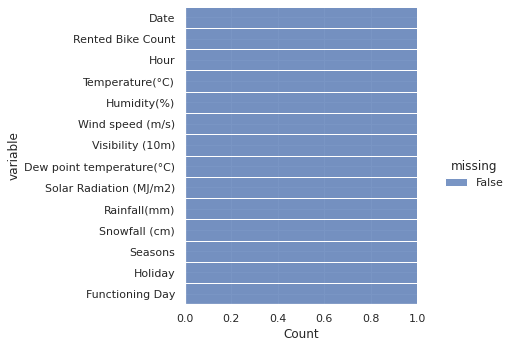

In [222]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

### What did you know about your dataset?


1) Dataset has 14 columns and 8760 rows

2) No missing or Null values found in dataset hence it is already Cleaned!



## ***2. Understanding Your Variables***

In [223]:
# Dataset Columns
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [224]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

**Date** - Year-Month-Day

**Rented Bike count** - Count of bikes rented at each hour

**Hour** - Hour of the day

**Temperature**-Temperature in Celsius

**Humidity** - Humidity in %

**Windspeed** - Windspeed in m/s

**Visibility** - Visibility in meters

**Dew point temperature** - Temperature in Celsius

**Solar radiation** - Solar Radiation MJ/m2

**Rainfall** - Rainfall in mm

**Snowfall** - Snowfall in cm

**Seasons** - Winter, Spring, Summer, Autumn

**Holiday** - Holiday/No holiday

**Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [225]:
# Check Unique Values for each variable.

#Checking Unique values for Numerical columns
num_cols = df.select_dtypes(include='number')
for col in num_cols:
    print(f"{col} has '{num_cols[col].nunique()}' unique values")

#Checking Unique values for Categorical columns
cat_cols = df.select_dtypes(exclude='number')
for col in cat_cols:
    print(f"{col} has '{cat_cols[col].nunique()}' unique values")



Rented Bike Count has '2166' unique values
Hour has '24' unique values
Temperature(°C) has '546' unique values
Humidity(%) has '90' unique values
Wind speed (m/s) has '65' unique values
Visibility (10m) has '1789' unique values
Dew point temperature(°C) has '556' unique values
Solar Radiation (MJ/m2) has '345' unique values
Rainfall(mm) has '61' unique values
Snowfall (cm) has '51' unique values
Date has '365' unique values
Seasons has '4' unique values
Holiday has '2' unique values
Functioning Day has '2' unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [226]:
# Write your code to make your dataset analysis ready.
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [227]:
df['Date'][0] #Succesfully converted into datetime format

Timestamp('2017-01-12 00:00:00')

In [228]:
#Year we are not Considering , that wont matter in Regression problem
df['month'] = pd.DatetimeIndex(df['Date']).month
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
df['weekdays_weekend']=df['weekday'].apply(lambda x : 1 if x>=6  else 0 )
df['timeshift'] = df['Hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4531 2018-07-06               2649    19             24.0           60   
5103 2018-01-07                 51    15             21.8           97   
121  2017-06-12                144     1             -3.0           79   
786  2018-02-01                675    18             -0.8           24   
8143 2018-05-11               1115     7              7.0           86   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4531               2.8              1379                       15.7   
5103               0.7               324                       21.2   
121                0.0               293                       -6.1   
786                2.3              2000                      -18.9   
8143               1.1               455                        4.8   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
4531                     0.38           0.0            0.0  Summer   
5103                     0.14           5.5            0.0  Summer   
121                      0.00           0.0            0.3  Winter   
786                      0.01           0.0            0.0  Winter   
8143                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  month  weekday  weekdays_weekend timeshift  
4531  No Holiday             Yes      7        4                 0   evening  
5103  No Holiday             Yes      1        6                 1       day  
121   No Holiday             Yes      6        0                 0     night  
786   No Holiday             Yes      2        3                 0   evening  
8143  No Holiday             Yes      5        4                 0       day

In [229]:
df=df.drop(columns=['Date','weekday'],axis=1)
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend timeshift  
0                 0     night  
1                 0     night  
2                 0     night  
3                 0     night  
4                 0     night

### What all manipulations have you done and insights you found?

Converted **'Date'** feature to datetime so i can fetch month , year , and whether it is weekend or weekday from it because it should have affected our count of bikes needed daily , other than that no need of Date feature.

From **'Hour'** feature we made new categorical column i.e. **'Timeshift'**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1(Seasons v/s Rented Bike Count)

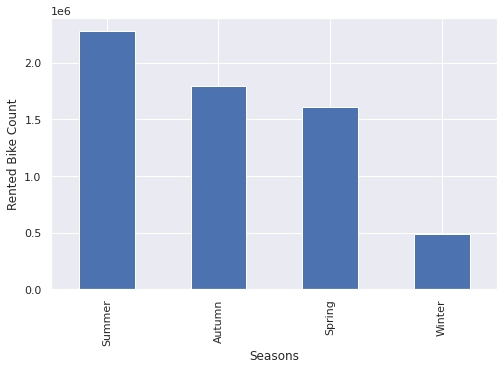

In [230]:
# Chart - 1 visualization code

seasons_group = df.groupby('Seasons')['Rented Bike Count'].sum()
seasons_group.sort_values(ascending=False).plot(kind='bar',xlabel = 'Seasons', ylabel = 'Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

To find out in which Season how many bike are rented 

##### 2. What is/are the insight(s) found from the chart?

Summer has the rented highest number of Bikes while Winter has the lowest

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2(Holiday & No Holiday bike count comparison)

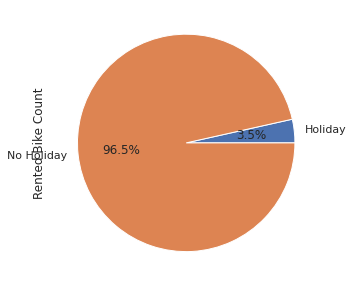

In [231]:
# Chart - 2 visualization code

holiday_group = df.groupby('Holiday')['Rented Bike Count'].sum()
holiday_group.plot(kind='pie', autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

to check the distribution of rented bikes on Holiday and Non Holiday day

##### 2. What is/are the insight(s) found from the chart?

Almost all of the rented bikes are counted on No holiday day

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

heatmap helps to find only correlation between features using that we can avoid number of dimensions in dataset 

#### Chart - 3(Timeshift v/s Rented Bike count)

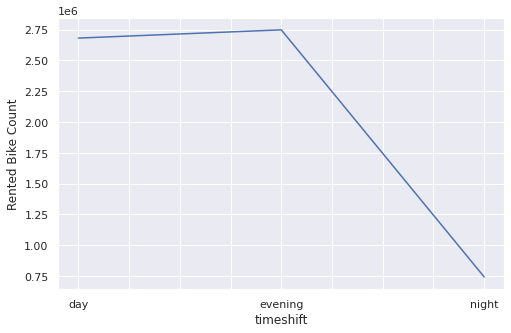

In [232]:
# Chart - 3 visualization code
timeshift_group = df.groupby('timeshift')['Rented Bike Count'].sum()
timeshift_group.plot(kind='line',xlabel = 'timeshift', ylabel = 'Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

To check counts of how count of rented bikes are variying in a day





##### 2. What is/are the insight(s) found from the chart?

in Day and Evening no of bikes are rented the most 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes it is correlated with temperature and will help in regression problem 

#### Chart - 4(Temperature & Humidity Variation)

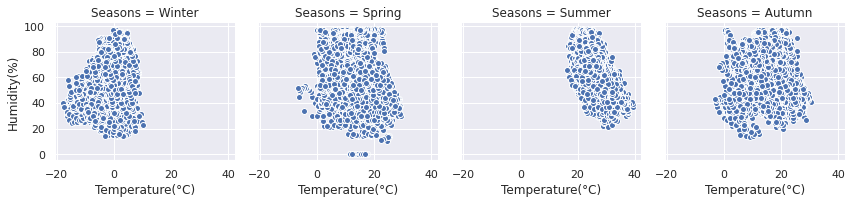

In [233]:
# Chart - 4 visualization code
g = sns.FacetGrid(df, col="Seasons")
g.map(plt.scatter, "Temperature(°C)", "Humidity(%)", edgecolor="w")
plt.show()


##### 1. Why did you pick the specific chart?

to check how temperature is variying in different different seasons

##### 2. What is/are the insight(s) found from the chart?

Temperatures are following according to season:

1) Winter : -20 to 15 degree

2) Spring : -5 to 30 degree

3) Autumn : 0 to 30 degree

4) Summer : 20 to 40 degree

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5(Histogram of all features)

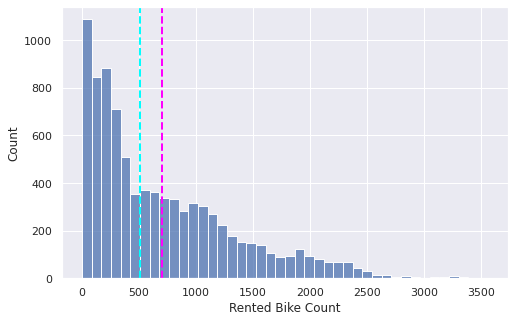

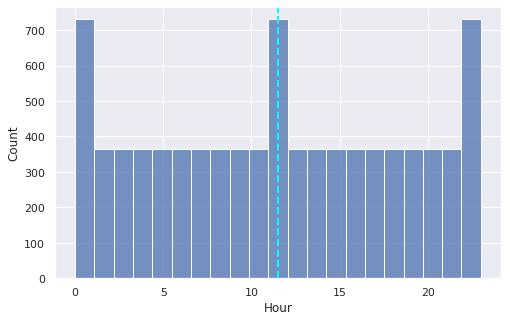

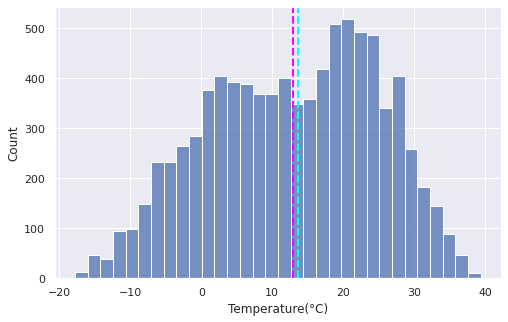

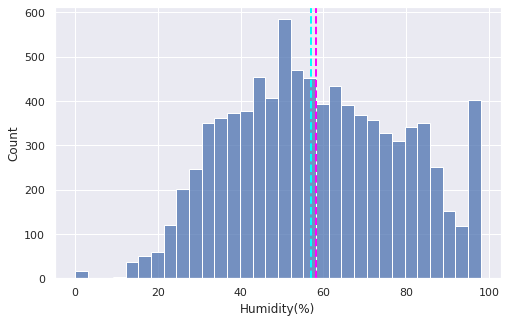

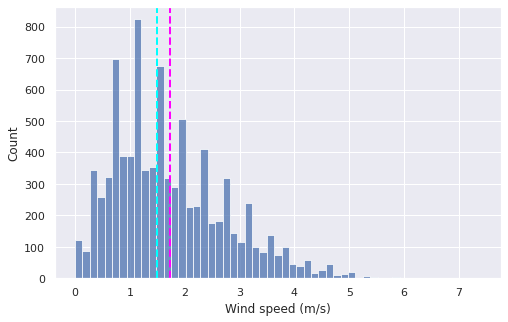

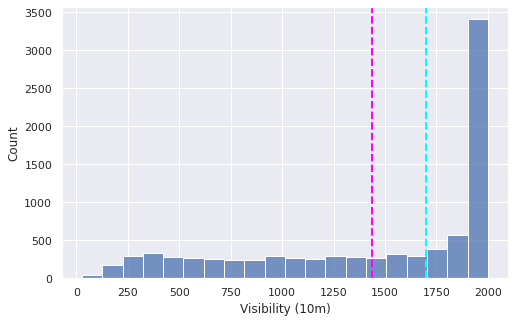

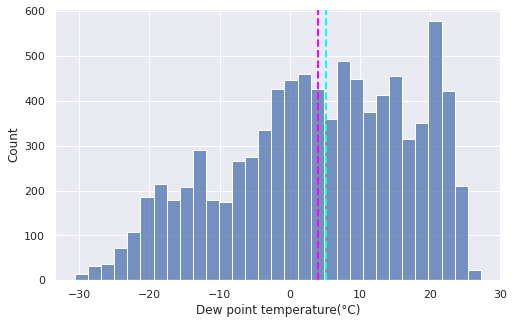

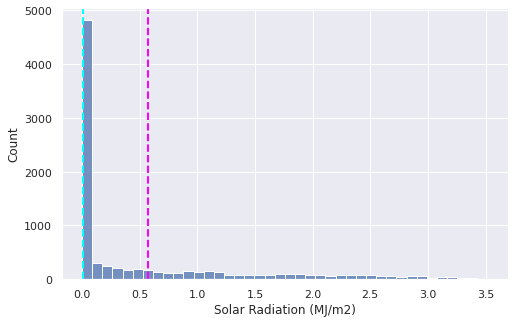

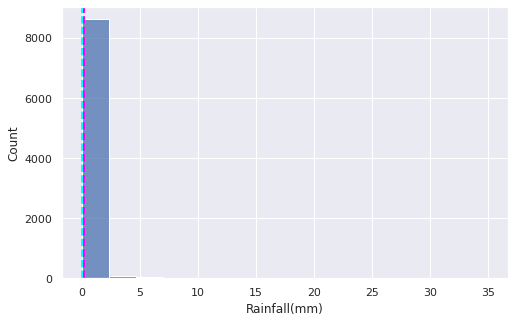

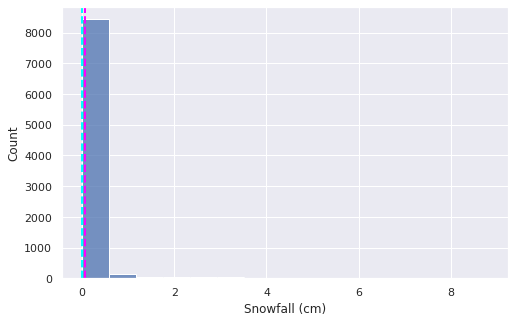

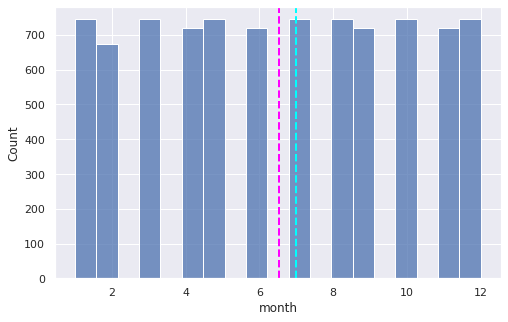

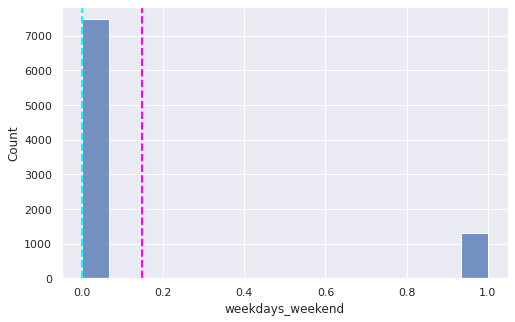

In [234]:
# Chart - 5 visualization code
 
numeric_features=df.select_dtypes(exclude='object')

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

##### 1. Why did you pick the specific chart?

To check count of values and mean , median of every column 

##### 2. What is/are the insight(s) found from the chart?

Features like Rainfall , Snowfall , Solar radiations are mostly lying at 0 

Humidity , temperature are normally distributed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6(Linearity of all with Dependent Feature)

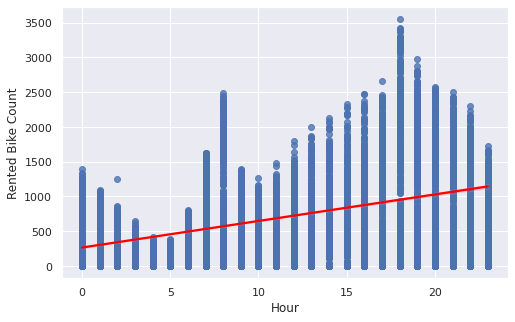

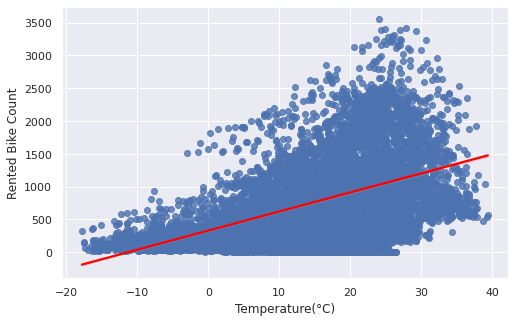

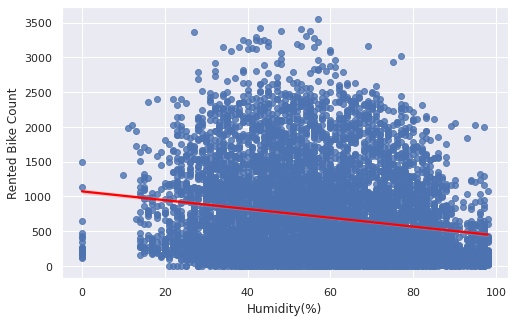

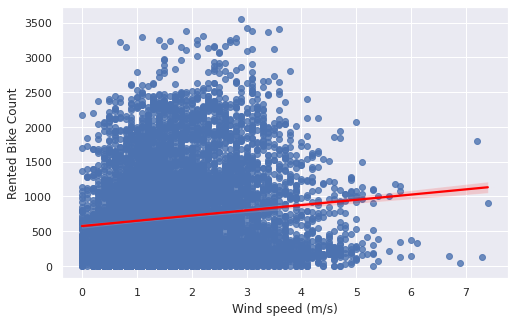

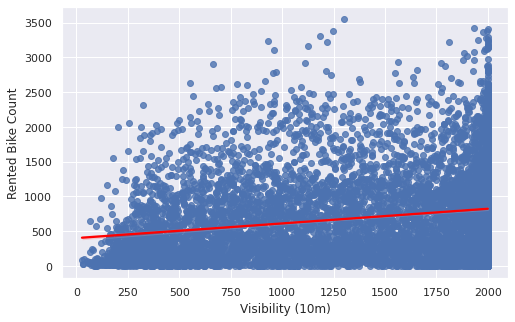

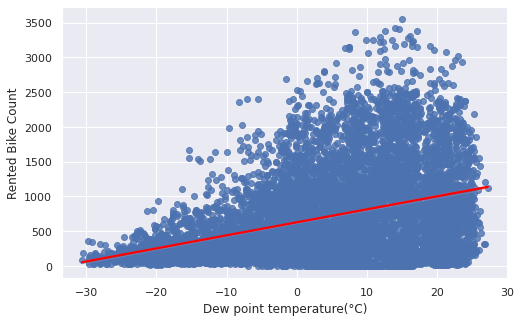

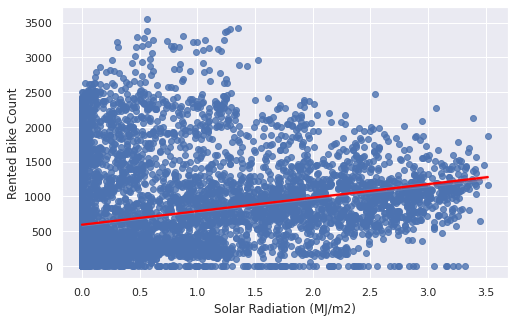

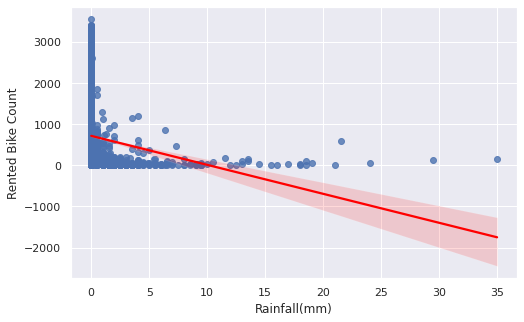

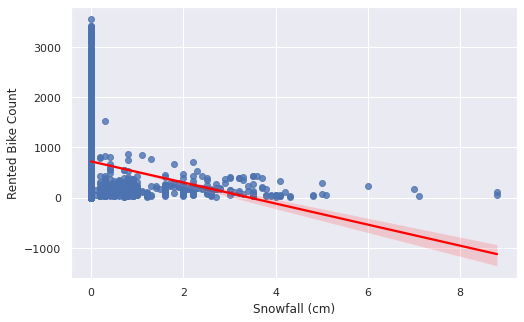

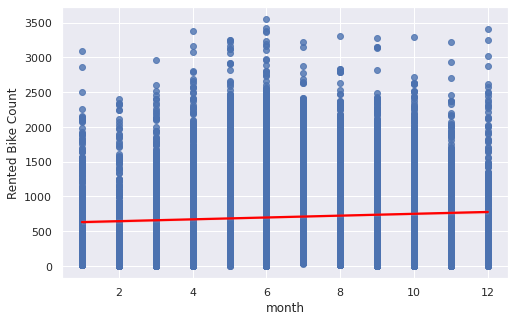

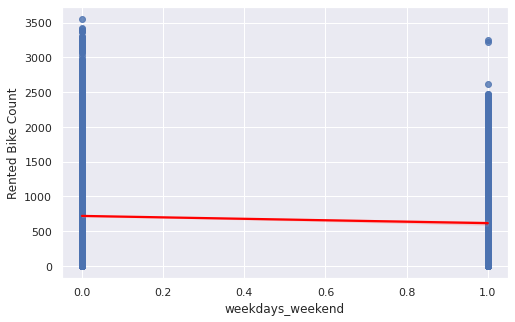

In [235]:
# Chart - 6 visualization code
#Basic regression plots with our dependent variable 

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

##### 1. Why did you pick the specific chart?

To Check the Relationship of all features with 'Rented Bike Count'

##### 2. What is/are the insight(s) found from the chart?

Snowfall , Rainfall and Humidity are having Negative Relationship with Count of 
rented bikes 




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , it will impact the regression problem positively 

#### Chart - 7(Categorical v/s Rented Bike Count- Box Plot )

In [236]:
# Chart - 7 visualization code
categorical_features=df.select_dtypes(include='object')
categorical_features.head()

Seasons     Holiday Functioning Day timeshift
0  Winter  No Holiday             Yes     night
1  Winter  No Holiday             Yes     night
2  Winter  No Holiday             Yes     night
3  Winter  No Holiday             Yes     night
4  Winter  No Holiday             Yes     night

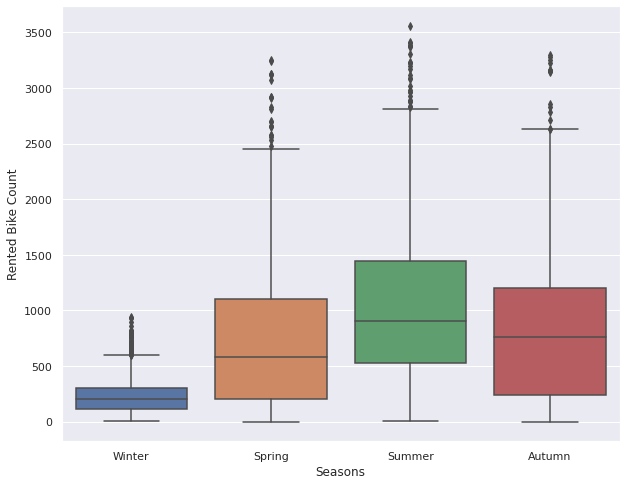

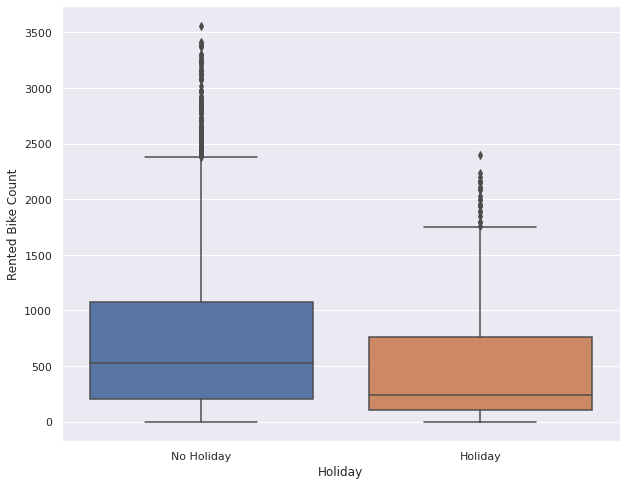

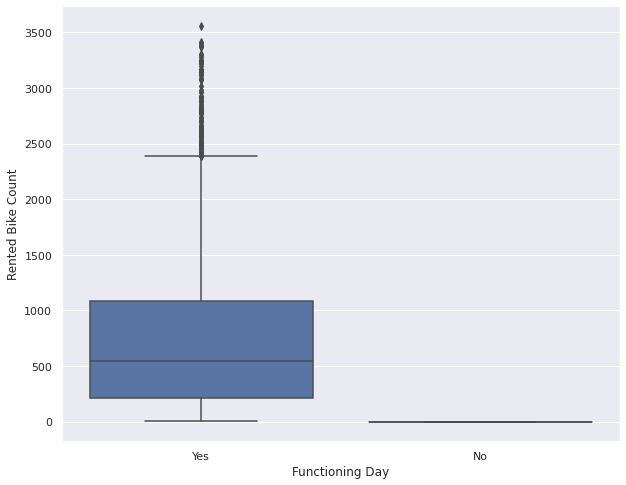

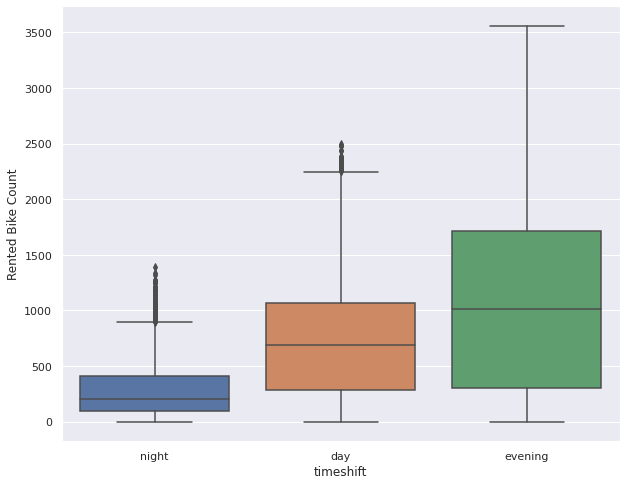

In [237]:
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Winter is badly affecting rented count of bikes , holiday and non holidays dont care much about it , but non functioning day is affecting 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8(Hour v/s Rented Bike Count)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

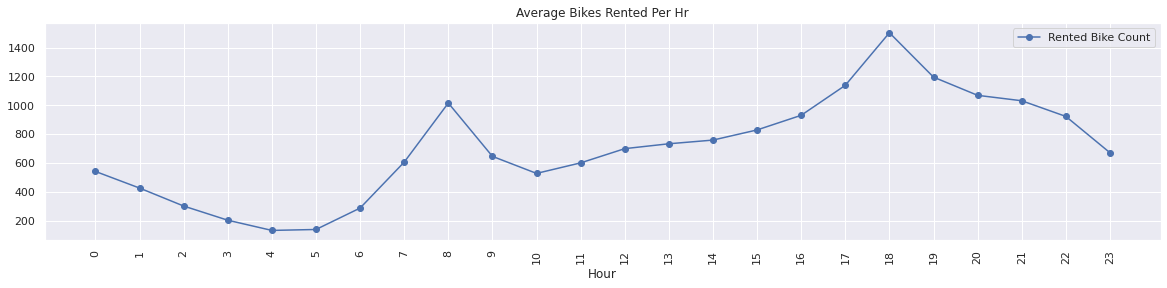

In [238]:
# Chart - 8 visualization code
avg_bikes_per_hr=df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(20,4))
a=avg_bikes_per_hr.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_bikes_per_hr)));
a.set_xticklabels(avg_bikes_per_hr.index.tolist(), rotation=90)

##### 1. Why did you pick the specific chart?

As we checked above using timeshift but to get more details we are plotting this to check At what time of the day bikes are rented most

##### 2. What is/are the insight(s) found from the chart?

between 6 to 9 am & 5 to 8 pm has most of the bikes rented

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , depend on hour of the day company can increase , decrease no of rented bikes accordingly

#### Chart - 9(Seasonwise % of Rented Bike count)

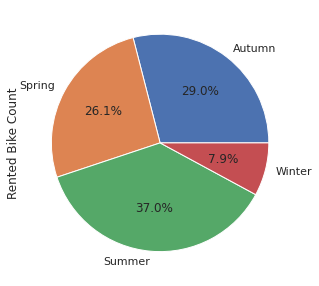

In [239]:
# Chart - 9 visualization code
seasons_group = df.groupby('Seasons')['Rented Bike Count'].sum()
seasons_group.plot(kind='pie', autopct='%1.1f%%')
plt.show()



##### 1. Why did you pick the specific chart?

To check percentage of bikes rented seasonwise 



##### 2. What is/are the insight(s) found from the chart?

percentage of rented bikes from overall count:

Summer: 37% , Winter: 7.9%, Autumn: 29% , Spring: 26.1%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company can decide next decisions based on seeing seasonwise distribution of bikes 

#### Chart - 10(Seasons v/s Holidays)

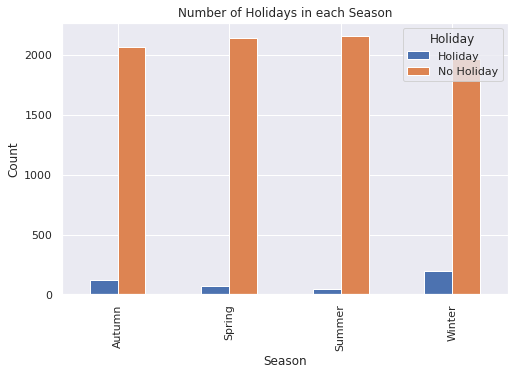

In [240]:
# Chart - 10 visualization code
grouped = df.groupby(['Seasons', 'Holiday']).size().reset_index(name='Count')

pivot_df = grouped.pivot(index='Seasons', columns='Holiday', values='Count')

pivot_df.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of Holidays in each Season')

plt.show()

##### 1. Why did you pick the specific chart?

To Check Number of holidays in each season

##### 2. What is/are the insight(s) found from the chart?

Winter has the highest number of holidays that can be affecting rented bike counts at some extend

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11(month v/s Rented Bike count)

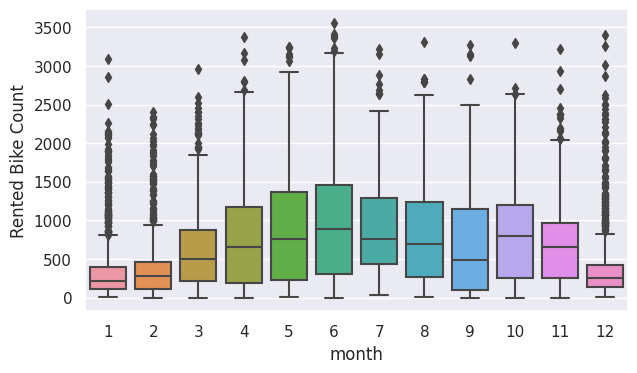

In [241]:
# Chart - 11 visualization code
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

to show monthwise count of rented bikes 

##### 2. What is/are the insight(s) found from the chart?

Rented bikes count seems low in month of January , February , and December when winter is there

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company already knew that in which season sell is better above graphs but this graph will get more idea about months present in season as it describes season in very detailed manner

#### Chart - 12(Outliers)

In [242]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend', 'timeshift'],
      dtype='object')

<Figure size 576x360 with 0 Axes>

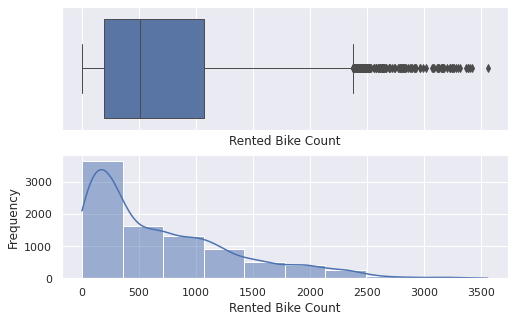

<Figure size 576x360 with 0 Axes>

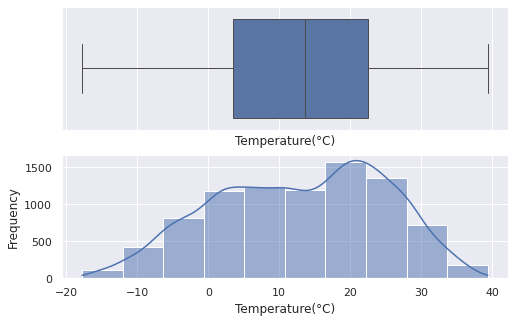

<Figure size 576x360 with 0 Axes>

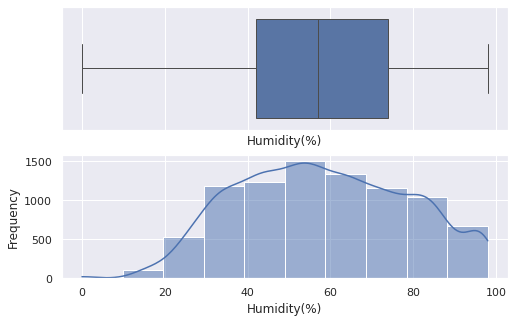

<Figure size 576x360 with 0 Axes>

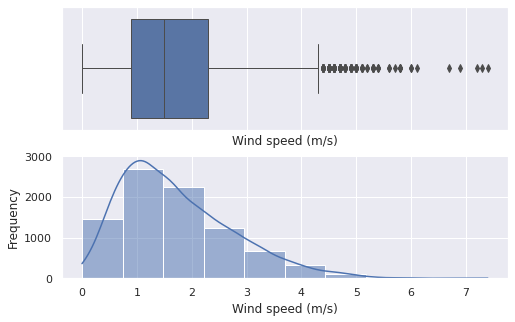

<Figure size 576x360 with 0 Axes>

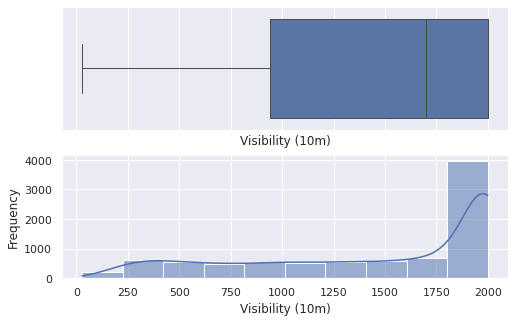

<Figure size 576x360 with 0 Axes>

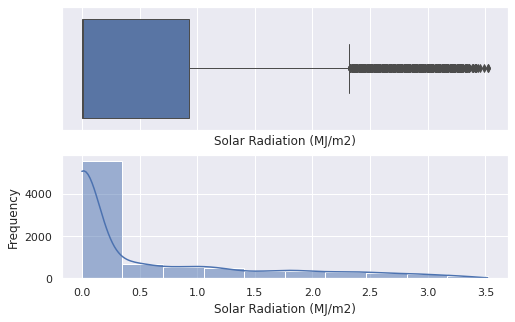

<Figure size 576x360 with 0 Axes>

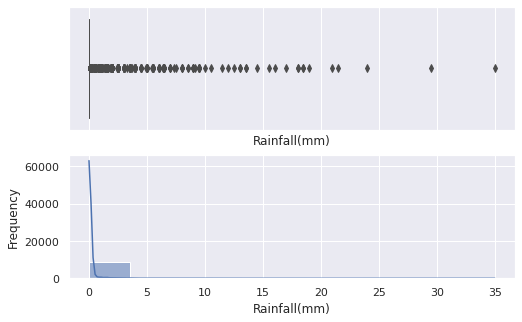

<Figure size 576x360 with 0 Axes>

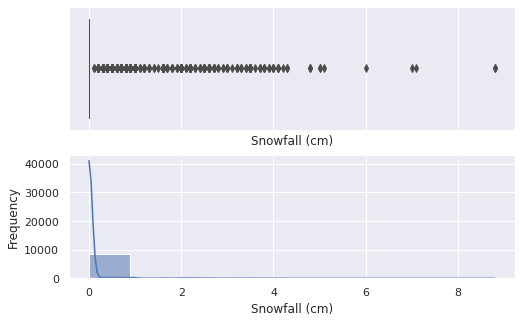

In [243]:
# Chart - 12 visualization code
num_columns=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for i in num_columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)



##### 1. Why did you pick the specific chart?

to check the outliers present in the numerical features and the distributions of the data

##### 2. What is/are the insight(s) found from the chart?

Solar radiation , wind spped , rainfall , snowfall has outliers and showing other distributions.

Rented bike count also has outliers and showing skewed distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will definately help to find and treat outliers from data to get perfect results from our ML models

#### Chart - 13(Functioning day v/s Seasons)

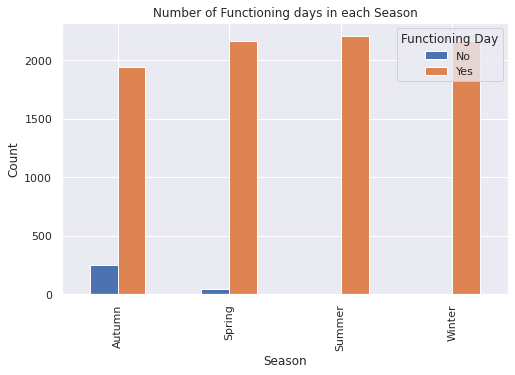

In [244]:
# Chart - 13 visualization code
grouped = df.groupby(['Seasons', 'Functioning Day']).size().reset_index(name='Count')

pivot_df = grouped.pivot(index='Seasons', columns='Functioning Day', values='Count')

pivot_df.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of Functioning days in each Season')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Season Autumn has the highest number of Functioning day which could be addding more count of rented bikes to its part .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

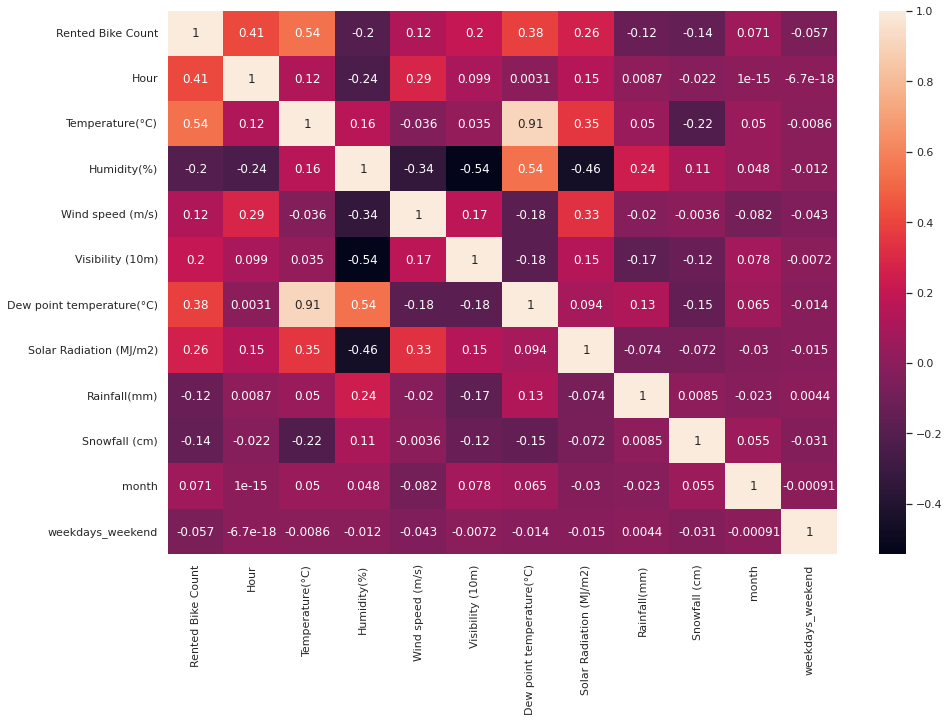

In [245]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().T,annot=True)

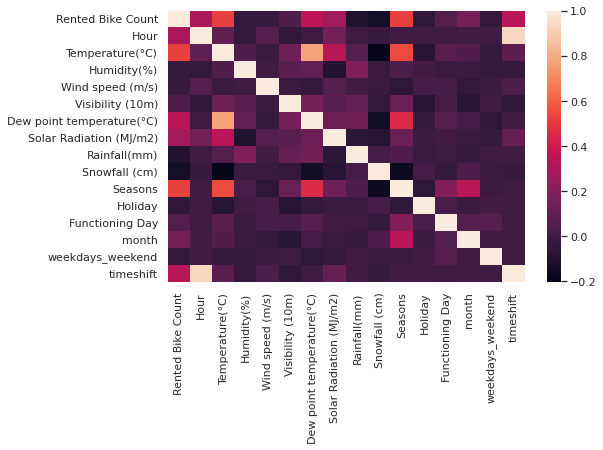

In [246]:
#Heatmap also for Categorical features
cat_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(cat_corr)

##### 1. Why did you pick the specific chart?

to check which features are correlated , highly postively correlated features can affect the results so need to drop them hence

##### 2. What is/are the insight(s) found from the chart?

Dew point temperature and temperature are highly positively correlated i.e 0.91 
if it was above 0.95 we could have dropped it 

#### Chart - 15 - Pair Plot 

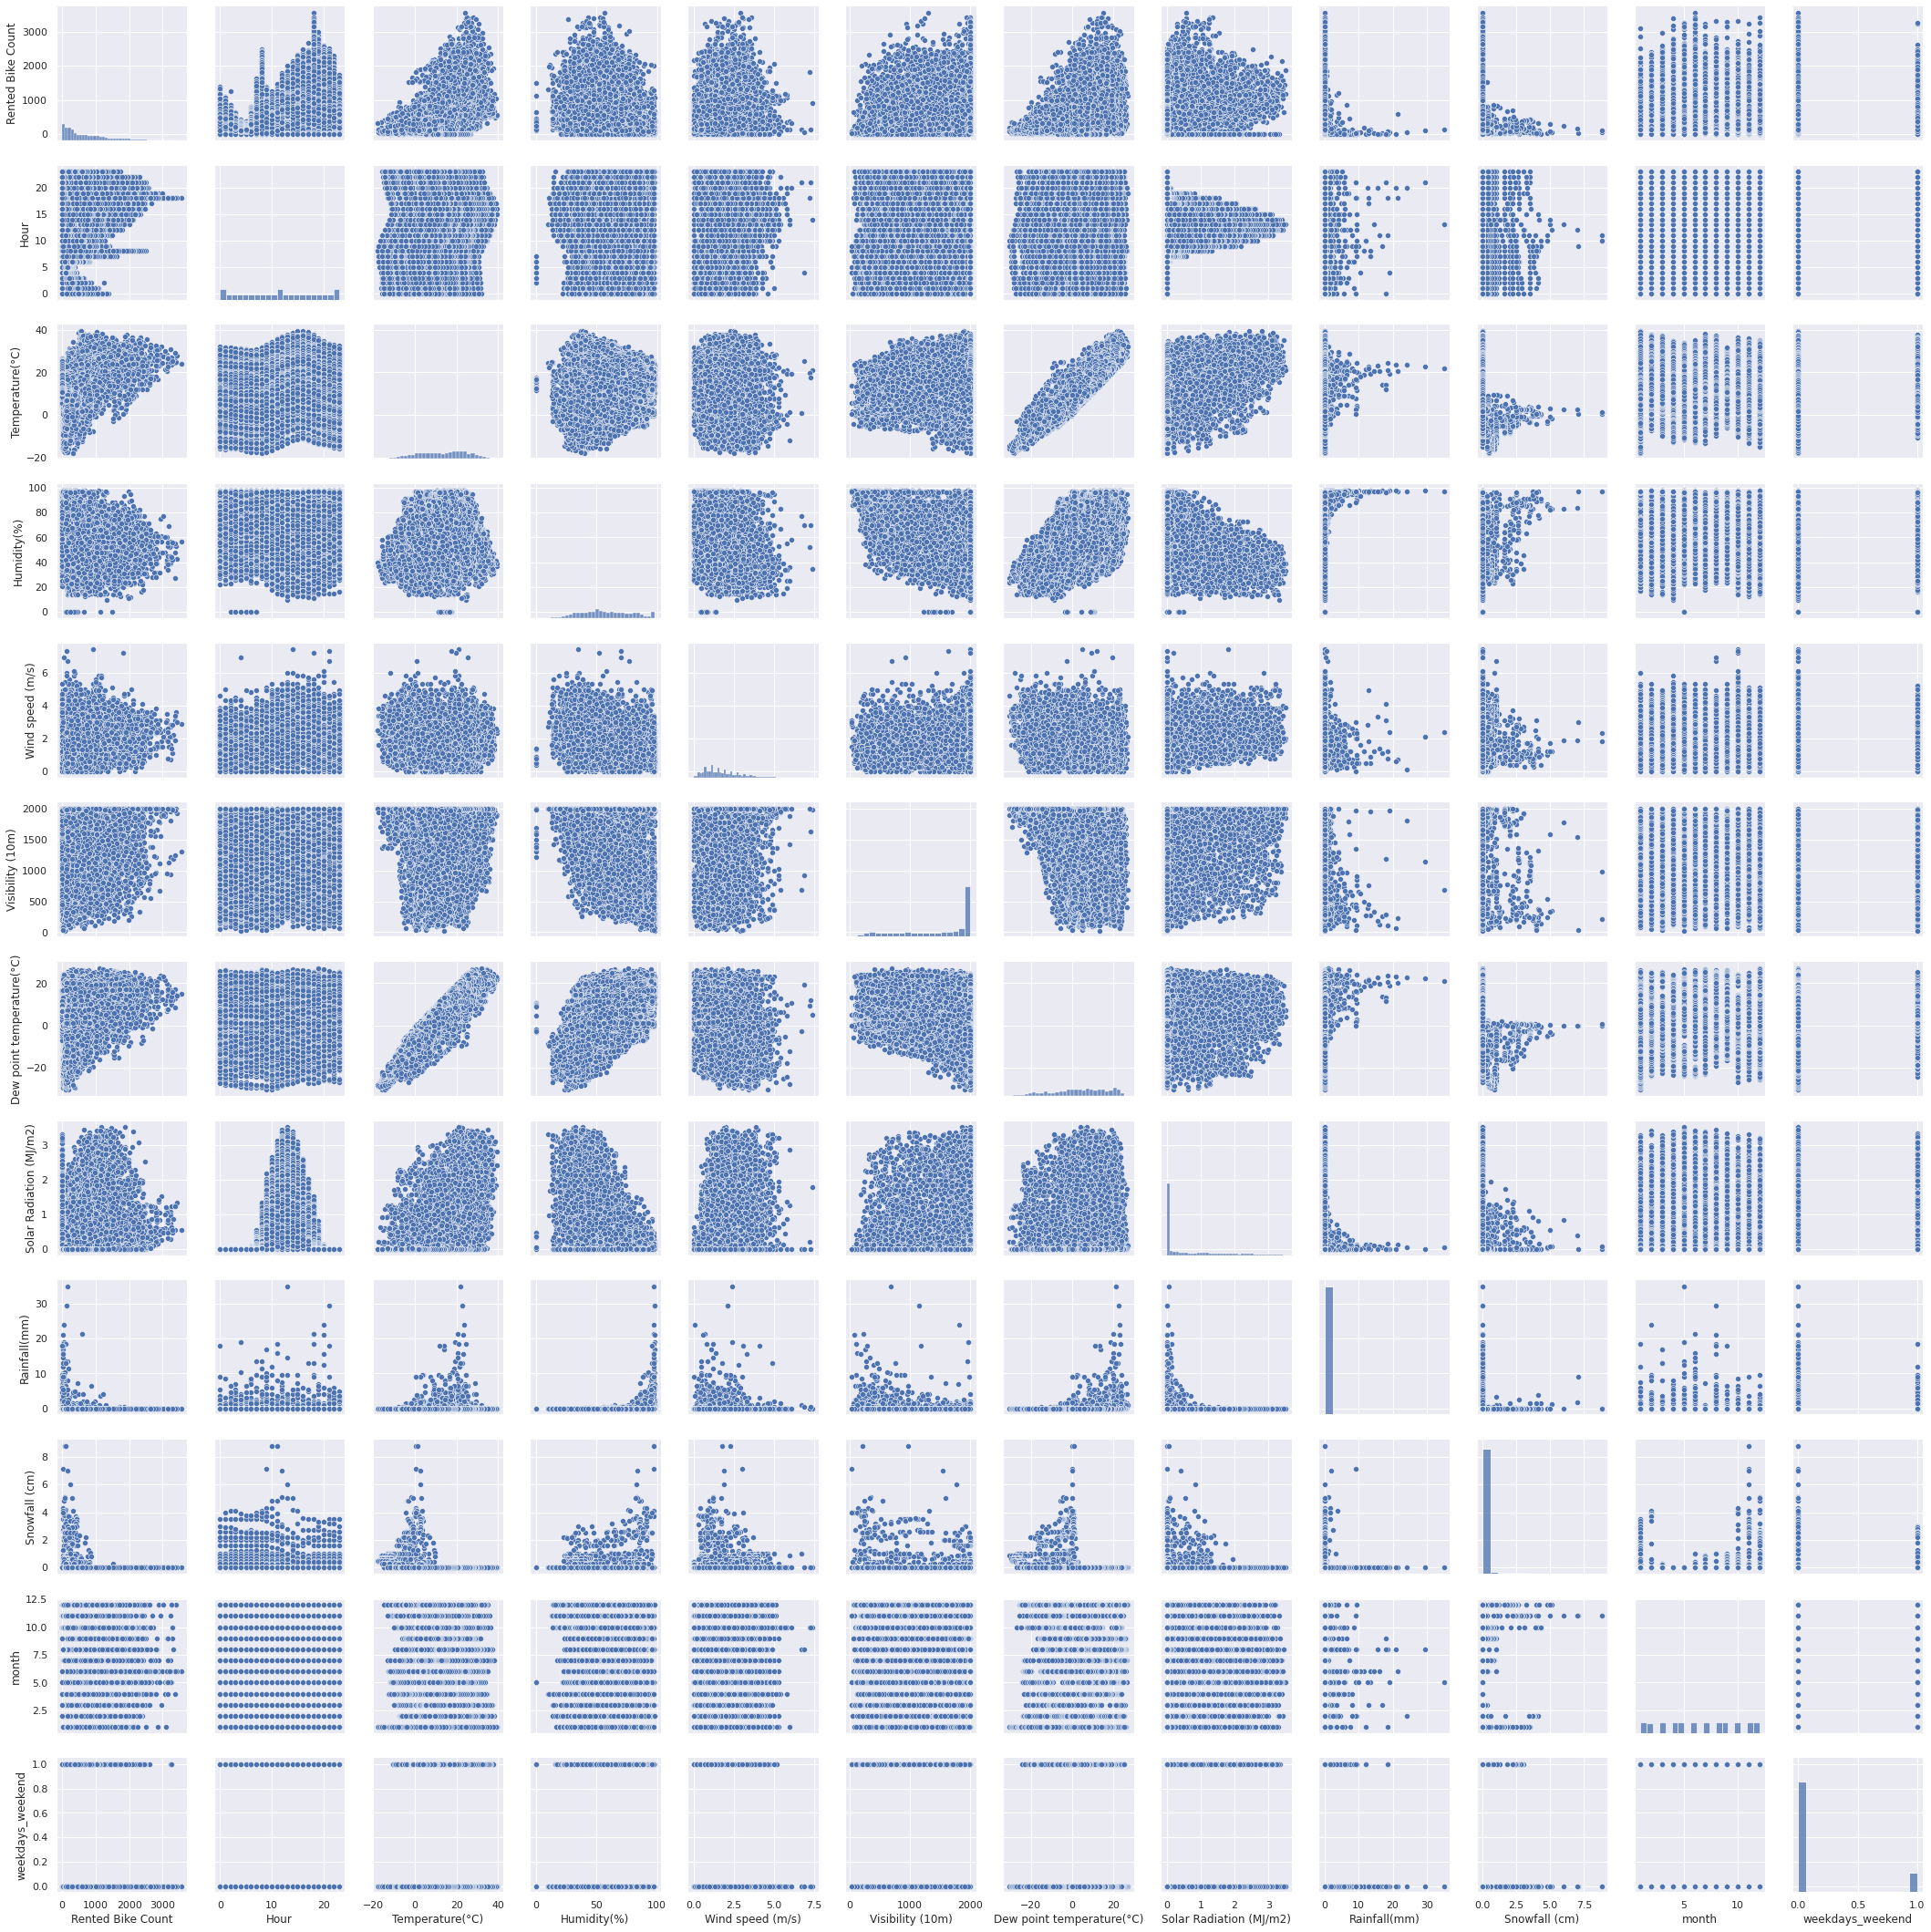

In [247]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Reasearchers took 20% of data as sample to find out number of bikes rented over the years on daily basis and claiming that there is no difference between sample mean of rented bikes and population mean of rented bikes

H0: There is Difference between sample mean of daily count of bikes and population count of bikes

H1: There is No Difference between Sample mean of daily count of bikes and population count of bikes

#### 2. Perform an appropriate statistical test.

In [248]:
# Perform Statistical Test to obtain P-Value

#Performing One Sample T-Test to compare sample and population of same group
from scipy.stats import ttest_1samp
alpha=0.05

pop_avg_bikes_count=np.mean(df['Rented Bike Count'])
sample_size=876*2
bike_count_sample=np.random.choice(df['Rented Bike Count'],sample_size)

ttest,p_value=ttest_1samp(bike_count_sample,pop_avg_bikes_count)
print(p_value)

if p_value < alpha:  
    print(" Reject H0, There is No difference between sample and population mean of rented bikes")
else:
    print("Accept H0, There is a difference between sample and population mean of rented bikes")






0.838124751968786
Accept H0, There is a difference between sample and population mean of rented bikes


##### Which statistical test have you done to obtain P-Value?

One Sample T-test 

##### Why did you choose the specific statistical test?

To Compare sample and population of rented bike count on daily basis

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Reasearchers also said that if we vary the count of bikes by 35 and still their mean will be same 

H0 : mean will be same after increasing numbers

H1 : mean will not be same after increasing numbers

#### 2. Perform an appropriate statistical test.

In [249]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
alpha=0.05

rented_bike_count=df['Rented Bike Count'].values
new_rented_bike_count=rented_bike_count+stats.norm.rvs(scale=35,size=len(rented_bike_count))

print(rented_bike_count)
print(new_rented_bike_count)

[254 204 173 ... 694 712 584]
[224.44799836 263.4977205  173.86419614 ... 668.82112442 710.01624144
 609.86379563]


In [250]:
bikes_df=pd.DataFrame({"bikes":np.array(rented_bike_count),
                         "bikes_new":np.array(new_rented_bike_count),
                       "numberof_bikes_change":np.array(new_rented_bike_count)-np.array(rented_bike_count)})
bikes_df

bikes   bikes_new  numberof_bikes_change
0       254  224.447998             -29.552002
1       204  263.497720              59.497720
2       173  173.864196               0.864196
3       107   51.175688             -55.824312
4        78   74.290994              -3.709006
...     ...         ...                    ...
8755   1003  937.480146             -65.519854
8756    764  801.495166              37.495166
8757    694  668.821124             -25.178876
8758    712  710.016241              -1.983759
8759    584  609.863796              25.863796

[8760 rows x 3 columns]

In [251]:
_,p_value=stats.ttest_rel(a=rented_bike_count,b=new_rented_bike_count)
print("P value is: ",p_value)

if p_value < alpha:  
    print(" Reject H0 , mean will not be same after increasing numbers")
else:
    print("Accept H0 , mean will be same after increasing numbers")


P value is:  0.3427848428249274
Accept H0 , mean will be same after increasing numbers


##### Which statistical test have you done to obtain P-Value?

**Two Sample T-test** 

##### Why did you choose the specific statistical test?

to compare two populations of before and after of rented bike count

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

They are confused about is there Relationship between Holidays and Functioning Day or not ?

#### 2. Perform an appropriate statistical test.

In [252]:
# Perform Statistical Test to obtain P-Value
dataset_table=pd.crosstab(df['Holiday'],df['Functioning Day'])
print(dataset_table)

Observed_Values = dataset_table.values 
print(Observed_Values)



Functioning Day   No   Yes
Holiday                   
Holiday           24   408
No Holiday       271  8057
[[  24  408]
 [ 271 8057]]


In [253]:
val=stats.chi2_contingency(dataset_table)
val

(5.996313634599221,
 0.014335802213322982,
 1,
 array([[  14.54794521,  417.45205479],
        [ 280.45205479, 8047.54794521]]))

In [254]:
Expected_Values=val[3]
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [255]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [256]:
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 6.684844941065825


In [257]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
if p_value<=alpha:
    print("There is a relationship between Holidays and Functioning Day ")
else:
    print("There is no relationship between Holidays and Functioning Day ")

There is a relationship between Holidays and Functioning Day 


##### Which statistical test have you done to obtain P-Value?

I have performed **Chi Square** test to obtain P-Value

##### Why did you choose the specific statistical test?

To Compare two categorical features

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [258]:
# Handling Missing Values & Missing Value Imputation
# No missing values are there

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [259]:
# Handling Outliers & Outlier treatments

# Removing outliers by Using IQR method:
q1, q3, median = df['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Rented Bike Count'] = np.where(df['Rented Bike Count'] > upper_limit, median,np.where(
                            df['Rented Bike Count'] < lower_limit,median,df['Rented Bike Count']))

# Removing outliers by Percentile:
for col in ['Solar Radiation (MJ/m2)','Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])



##### What all outlier treatment techniques have you used and why did you use those techniques?

***Note1***-if data is Skewed then use IQR to remove outliers

***Note2***-if data is Normally distributed then Z-score Treatment

***Note3***-if data is distributed in different way then percentile Approch

"No need of **Trimming** it will reduce our data size since i used **Capping** along with methods"

1)'Solar Radiation' , 'Wind spped' , 'Rainfall' , 'Snowfall' has outliers and showing **other** distributions so i used **Percentile** method to treat outliers.

2)'Rented Bike Count' also has outliers and showing **Skewed** distribution so we can use **IQR method** to treat outliers.

<Figure size 576x360 with 0 Axes>

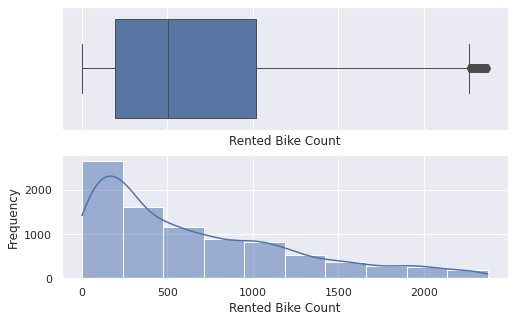

<Figure size 576x360 with 0 Axes>

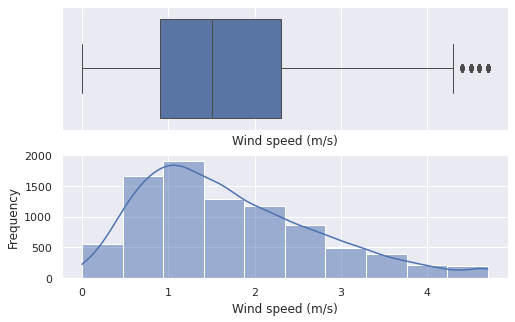

<Figure size 576x360 with 0 Axes>

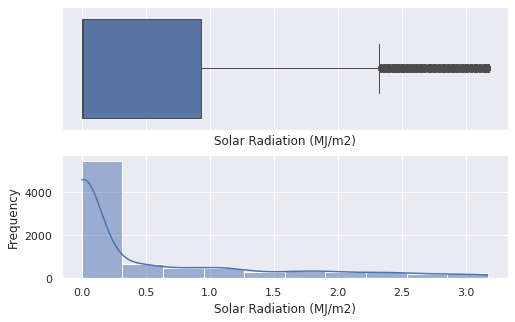

<Figure size 576x360 with 0 Axes>

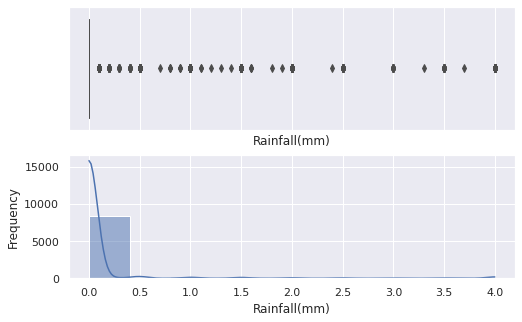

<Figure size 576x360 with 0 Axes>

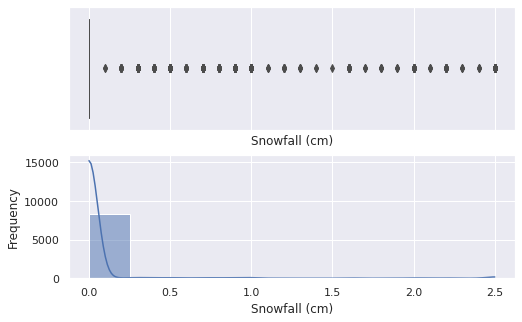

In [260]:
for i in ['Rented Bike Count','Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

### 3. Categorical Encoding

In [261]:
# Encode your categorical columns
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend timeshift  
0                 0     night  
1                 0     night  
2                 0     night  
3                 0     night  
4                 0     night

In [262]:
encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},'timeshift': {'night':0, 'day':1, 'evening':2}}

# Label Encoding
df = df.replace(encoder)

# One Hot Encoding
df = pd.get_dummies(df, columns=["Seasons"], prefix='', prefix_sep='')
# New look
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  month  \
0           0.0            0.0        0                1      1   
1           0.0            0.0        0                1      1   
2           0.0            0.0        0                1      1   
3           0.0            0.0        0                1      1   
4           0.0            0.0        0                1      1   

   weekdays_weekend  timeshift  Autumn  Spring  Summer  Winter  
0                 0          0       0       0       0       1  
1                 0          0       0       0       0       1  
2                 0          0       0       0       0       1  
3                 0          0       0       0       0       1  
4                 0          0       0       0       0       1

In [263]:
df.shape

(8760, 19)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Sesons , Holidays, Functioning Day features are Nominal hence i used OneHotEncoding on them and after that removing one column from them to avoid Multicollinearity

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [264]:
# Expand Contraction

#### 2. Lower Casing

In [265]:
# Lower Casing

#### 3. Removing Punctuations

In [266]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [267]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [268]:
# Remove Stopwords

In [269]:
# Remove White spaces

#### 6. Rephrase Text

In [270]:
# Rephrase Text

#### 7. Tokenization

In [271]:
# Tokenization

#### 8. Text Normalization

In [272]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [273]:
# POS Taging

#### 10. Text Vectorization

In [274]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [275]:
# Manipulate Features to minimize feature correlation and create new features


# Calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]
calc_vif(df[independent_variables])

variables         VIF
0   Dew point temperature(°C)  119.111691
1                      Summer  117.918530
2                      Spring  113.488844
3                      Autumn  112.883424
4                      Winter  108.537010
5             Temperature(°C)   90.886828
6                 Humidity(%)   21.213071
7                        Hour    8.785110
8                   timeshift    8.555105
9     Solar Radiation (MJ/m2)    2.081100
10           Visibility (10m)    1.692250
11           Wind speed (m/s)    1.315352
12                      month    1.224772
13               Rainfall(mm)    1.180244
14              Snowfall (cm)    1.153912
15            Functioning Day    1.085826
16                    Holiday    1.023462
17           weekdays_weekend    1.012303

#### 2. Feature Selection

In [276]:
# Select your features wisely to avoid overfitting
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour','Humidity(%)','Summer','Winter']]
calc_vif(df[independent_variables])

variables        VIF
0           Functioning Day  10.645201
1          Visibility (10m)   6.973353
2                     month   5.104466
3          Wind speed (m/s)   4.787653
4                 timeshift   2.958568
5           Temperature(°C)   2.714437
6   Solar Radiation (MJ/m2)   1.947234
7                    Autumn   1.686848
8                    Spring   1.540489
9          weekdays_weekend   1.163528
10            Snowfall (cm)   1.143318
11             Rainfall(mm)   1.111244
12                  Holiday   1.056472

In [277]:
df=df.drop(columns= ['Dew point temperature(°C)','Hour','Humidity(%)','Summer','Winter'])
df.head()

Rented Bike Count  Temperature(°C)  Wind speed (m/s)  Visibility (10m)  \
0              254.0             -5.2               2.2              2000   
1              204.0             -5.5               0.8              2000   
2              173.0             -6.0               1.0              2000   
3              107.0             -6.2               0.9              2000   
4               78.0             -6.0               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  month  weekdays_weekend  timeshift  Autumn  Spring  
0                1      1                 0          0       0       0  
1                1      1                 0          0       0       0  
2                1      1                 0          0       0       0  
3                1      1                 0          0       0       0  
4                1      1                 0          0       0       0

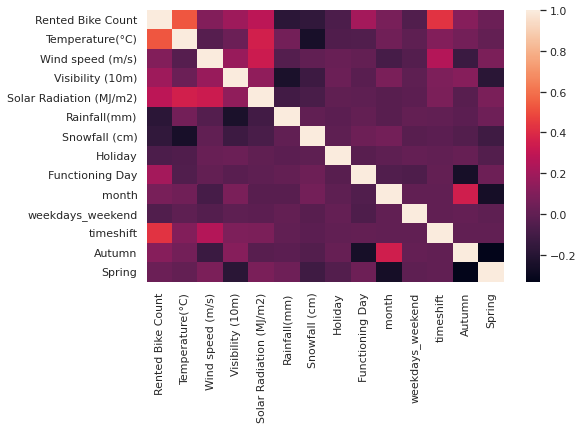

In [278]:
sns.heatmap(df.corr())

##### What all feature selection methods have you used  and why?

VIF(Variance Inflation factor) to avoid Multicollinearity

##### Which all features you found important and why?

Above selected Features won't impact badly on model as they will remove
Multicoliinearity

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

####--My Dependent variable is not normally distributed so i used SQRT transformation on it 

In [279]:
df.head()

Rented Bike Count  Temperature(°C)  Wind speed (m/s)  Visibility (10m)  \
0              254.0             -5.2               2.2              2000   
1              204.0             -5.5               0.8              2000   
2              173.0             -6.0               1.0              2000   
3              107.0             -6.2               0.9              2000   
4               78.0             -6.0               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  month  weekdays_weekend  timeshift  Autumn  Spring  
0                1      1                 0          0       0       0  
1                1      1                 0          0       0       0  
2                1      1                 0          0       0       0  
3                1      1                 0          0       0       0  
4                1      1                 0          0       0       0

In [280]:
# Transform Your data
print(f"Skewness of original data : {df['Rented Bike Count'].skew()}")
print(f"Skewness after log transformation : {np.log(df['Rented Bike Count']).skew()}")
print(f"Skewness after transformation : {np.sqrt(df['Rented Bike Count']).skew()}")



Skewness of original data : 0.983470199089409
Skewness after log transformation : nan
Skewness after transformation : 0.153123685071092


divide by zero encountered in log


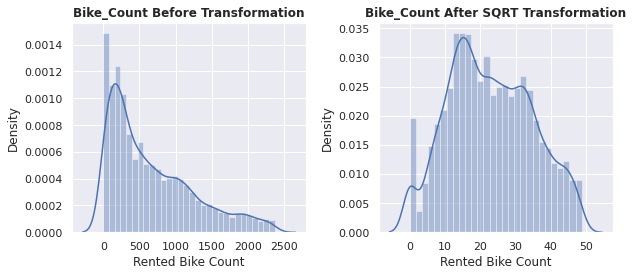

In [281]:
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count'])).set_title('Bike_Count After SQRT Transformation',weight='bold')
plt.tight_layout()

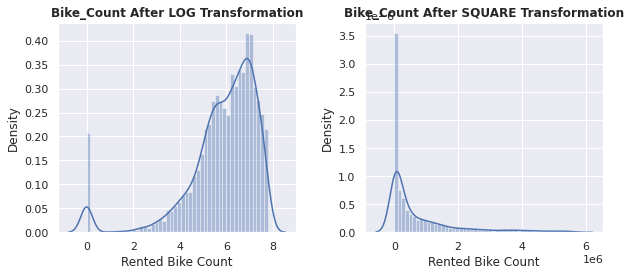

In [282]:
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(np.log1p(df['Rented Bike Count'])).set_title('Bike_Count After LOG Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot((df['Rented Bike Count'])**2).set_title('Bike_Count After SQUARE Transformation',weight='bold')
plt.tight_layout()

### 6. Data Scaling

In [283]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()



##### Which method have you used to scale you data and why?
StandardScaler is for data which is normally distributed which reduces units to -1 to 1 making mean=0

MinMaxScaler is for data which boundries are known which reduces units to 0 to 1 

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [284]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting & Scaling also

In [285]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop(['Rented Bike Count'],axis=1)
y = np.sqrt(df['Rented Bike Count'])

#Splitting to Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test.shape

X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

#y_train = minmax_scaler.fit_transform(y_train.values.reshape(-1,1))
#y_test = minmax_scaler.transform(y_test.values.reshape(-1,1))


##### What data splitting ratio have you used and why? 

I used 80 , 20 for train and test respectively because which is standard practice for splitting , i have enough rows to test thats why i prefer keeping 20% for test instead 25 or 30 .

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, some features are imbalanced but for regression problem there is no need of balancing it

In [286]:
# Handling Imbalanced Dataset (If needed)
X.head()

Temperature(°C)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2               2.2              2000   
1             -5.5               0.8              2000   
2             -6.0               1.0              2000   
3             -6.2               0.9              2000   
4             -6.0               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   Functioning Day  month  weekdays_weekend  timeshift  Autumn  Spring  
0                1      1                 0          0       0       0  
1                1      1                 0          0       0       0  
2                1      1                 0          0       0       0  
3                1      1                 0          0       0       0  
4                1      1                 0          0       0       0

In [287]:
X['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Functions for Implementing ML Models


In [288]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """Trains the input model on the input data and returns the  Scoring Metrics for the prediction."""

    #Model training and fitting without Hyperparameter tuning
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    actual,predicted = y_test**2,y_pred**2

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual , predicted)
    print("Train R2 :",r2_score(y_train**2,lr.predict(X_train)**2))
    print("Test R2 :" ,r2)
    print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))
    print("MSE :" , mse)
    print("RMSE :" ,rmse)
    print("MAE :" ,mean_absolute_error(actual,predicted))



def hyperparameter_tuning(X_train, y_train, model, parameters, tuning_model):
    """Trains the input model on the input data with parameters grid and returns the Scoring Metrics for the prediction."""

    if tuning_model == 'Halving_Randomized_SearchCV':
        grid = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "neg_mean_squared_error", n_jobs=1, factor=3, cv = 5 )
    
    elif tuning_model == 'RandomizedSearchCV':
        grid = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'neg_mean_squared_error', cv = 5, n_iter = 50, n_jobs=1)

    else:
        grid = GridSearchCV(model, param_grid = parameters, scoring = 'neg_mean_squared_error', n_jobs=1, cv = 3)
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    y_pred = best_model.predict(X_test)

    best_estimator = grid.best_estimator_
    r2_score_train = best_estimator.score(X_train, y_train)
    r2_score_test = best_estimator.score(X_test, y_test)
    mse = mean_squared_error(y_test**2, y_pred**2)
    rmse = np.sqrt(mse)
    print("Train r2: ", r2_score_train)
    print("Test r2: ", r2_score_test)
    print("RMSE:", rmse)


    print("Best Hyperparameters: ",best_params)
    

def cross_validation(model,cv=5):
  CVS=cross_val_score(model,X,y,scoring='r2',cv=5)
  mean_CVS=np.mean(CVS)
  print(mean_CVS)


  



### ML Model - 1(Linear Regression)


In [289]:
# ML Model - 1 Implementation

lr = LinearRegression()
train_and_evaluate(lr, X_train, y_train, X_test, y_test)

Train R2 : 0.585359282886202
Test R2 : 0.5929908722685548
Adjusted R2 :  0.5899465001969157
MSE : 137044.46279535568
RMSE : 370.19516851973594
MAE : 254.17231297839967


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [290]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [291]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.
cross_validation(lr,cv=5)


0.3963187672652877


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

###Lasso Regression 

In [292]:
lasso = Lasso()
param_grid_lasso = {'alpha': [0.01,0.1], 
              'normalize': [True,False], 
              'fit_intercept': [False,True], 
              'positive': [False,True]}

hyperparameter_tuning(X_train, y_train, lasso, param_grid_lasso, 'GridSearchCV')

Train r2:  0.6706157049882232
Test r2:  0.6695648368501326
RMSE: 370.87317441788366
Best Hyperparameters:  {'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'positive': False}


###Ridge Regression 

In [293]:
ridge = Ridge()
train_and_evaluate(ridge, X_train, y_train, X_test, y_test)

Train R2 : 0.585359282886202
Test R2 : 0.5925364826387771
Adjusted R2 :  0.5894887117954538
MSE : 137197.4607958176
RMSE : 370.40175592971696
MAE : 254.3441723415018


In [294]:
#Hyperparamter Tuning
param_grid_ridge = {'alpha': [0.01, 0.1, 1], 
              'normalize': [True, False], 
              'fit_intercept': [True, False], 
              'positive': [True, False]}

hyperparameter_tuning(X_train, y_train, ridge, param_grid_ridge, 'RandomizedSearchCV')

The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.


Train r2:  0.6708030504637614
Test r2:  0.6695382411101515
RMSE: 370.215679359192
Best Hyperparameters:  {'positive': False, 'normalize': False, 'fit_intercept': True, 'alpha': 0.1}


### ML Model - 2(Decision Tree)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [295]:
#Parameters for next tree regressor models

n_estimators = [50,100,150]
max_depth = [6,8,10,12,14]
min_samples_split = [40,50,100,150]
min_samples_leaf = [40,50]
max_leaf_nodes= [None, 10, 20, 30]
min_impurity_decrease= [0.0, 0.05, 0.1]
splitter= ['best', 'random']
criterion= ['gini', 'entropy']
eta = [0.05,0.08,0.1]

#Without Tuning
dt_regressor = DecisionTreeRegressor()
train_and_evaluate(dt_regressor, X_train, y_train, X_test, y_test)


Train R2 : 0.585359282886202
Test R2 : 0.5060724386833495
Adjusted R2 :  0.5023779287310386
MSE : 166310.85813172243
RMSE : 407.8122829583759
MAE : 246.52267333343335


#### 2. Cross- Validation & Hyperparameter Tuning

In [296]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Hyperparameter tuning
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'max_leaf_nodes': max_leaf_nodes,
        'min_impurity_decrease': min_impurity_decrease,
        'splitter': splitter
        }

hyperparameter_tuning(X_train, y_train, dt_regressor, grid, 'Halving_Randomized_SearchCV')

Train r2:  0.7745913836366728
Test r2:  0.7516861427348093
RMSE: 322.73179823931525
Best Hyperparameters:  {'splitter': 'best', 'min_samples_split': 50, 'min_samples_leaf': 40, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_depth': 10}


##### Which hyperparameter optimization technique have you used and why?

I used HalvingRandomizedSearchCV as it is not exhaustive searching , decisiontree will take much time if used with other CV's with same result(i tried) hence.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes , I have seen improvement after tuning 

train and test r2s are getting improved 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Train and Test r2 are closer to one another and train r2 is not very high hence it is indicating model is not overfitting and working well although it is performing average 

### ML Model - 3(Random Forest)

In [297]:
#Without tuning
rf_regressor = RandomForestRegressor()
train_and_evaluate(dt_regressor, X_train, y_train, X_test, y_test)



Train R2 : 0.585359282886202
Test R2 : 0.5154394533750416
Adjusted R2 :  0.5118150073991357
MSE : 163156.88096277267
RMSE : 403.92682624798846
MAE : 244.08374639279404


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [298]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [299]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

grid_rf = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'n_estimators':n_estimators
        }

hyperparameter_tuning(X_train, y_train, rf_regressor, grid_rf, 'Halving_Randomized_SearchCV')

The total space of parameters 120 is smaller than n_iter=700. Running 120 iterations. For exhaustive searches, use GridSearchCV.


Train r2:  0.7832822112929149
Test r2:  0.7559465354558846
RMSE: 320.6545851712455
Best Hyperparameters:  {'n_estimators': 50, 'min_samples_split': 40, 'min_samples_leaf': 40, 'max_depth': 12}


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4(XGBoost Regressor)

In [300]:
#Without Hyperparameter Tuning
xgb_regressor = XGBRegressor(verbosity=0, random_state=42)
train_and_evaluate(xgb_regressor, X_train, y_train, X_test, y_test)

Train R2 : 0.585359282886202
Test R2 : 0.6957407206863893
Adjusted R2 :  0.6934649032922138
MSE : 102447.45545743294
RMSE : 320.0741405634528
MAE : 212.31853492926265


In [323]:
# Hyperparameter Tuning using Grid
grid_xgb = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'eta' : eta}

hyperparameter_tuning(X_train, y_train, xgb_regressor, grid_xgb, 'Halving_Randomized_SearchCV')

The total space of parameters 360 is smaller than n_iter=700. Running 360 iterations. For exhaustive searches, use GridSearchCV.


Train r2:  0.8764046365488418
Test r2:  0.7882310410689778
RMSE: 304.51310923762264
Best Hyperparameters:  {'n_estimators': 50, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 8, 'eta': 0.1}


### ML Model - 4(GradientBoost Regressor)

In [302]:
#Without Hyperparameter tuning
gb_regressor = GradientBoostingRegressor(random_state=4)
train_and_evaluate(xgb_regressor, X_train, y_train, X_test, y_test)


Train R2 : 0.585359282886202
Test R2 : 0.6957407206863893
Adjusted R2 :  0.6934649032922138
MSE : 102447.45545743294
RMSE : 320.0741405634528
MAE : 212.31853492926265


In [324]:
# Hyparameter tuning using grid
grid_gbr = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

hyperparameter_tuning(X_train, y_train, xgb_regressor, grid_gbr, 'Halving_Randomized_SearchCV')

The total space of parameters 120 is smaller than n_iter=700. Running 120 iterations. For exhaustive searches, use GridSearchCV.


Train r2:  0.8752629518234487
Test r2:  0.78278114980096
RMSE: 310.0555094015266
Best Hyperparameters:  {'n_estimators': 150, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 6}


### Feature Importance & Actual vs predicted 





In [304]:
features = [i for i in df.columns if i not in ['Rented Bike Count']]


In [305]:
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''For Non linear Regressor model plots the both graph &
     for linear model plots only actual v/s predicted plot'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

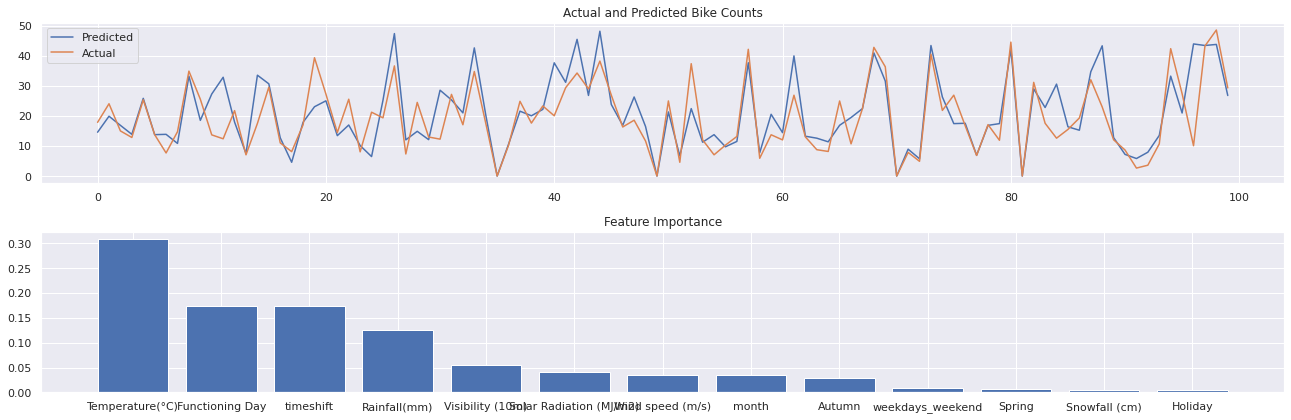

DecisionTreeRegressor()

In [306]:
analyse_model(dt_regressor, X_train, X_test, y_train, y_test)


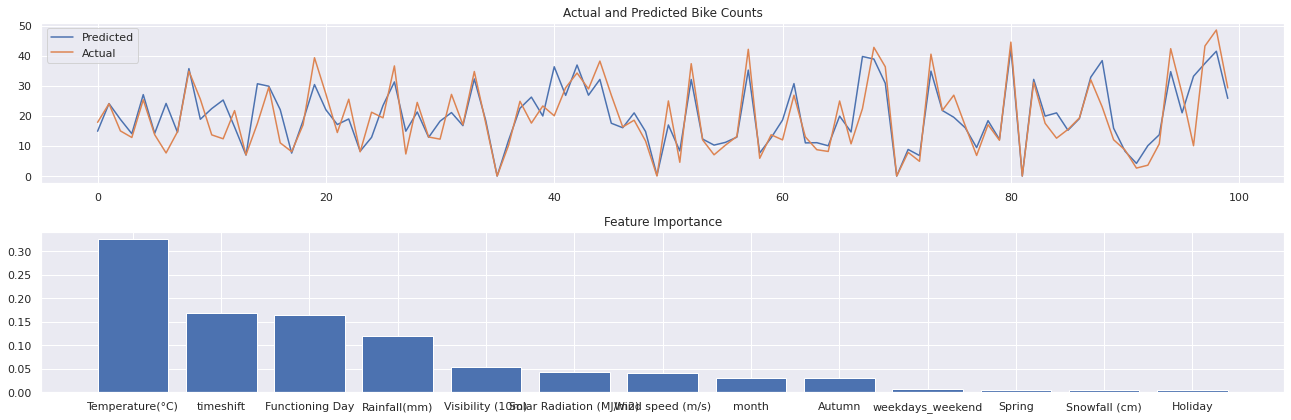

RandomForestRegressor()

In [307]:
analyse_model(rf_regressor, X_train, X_test, y_train, y_test)


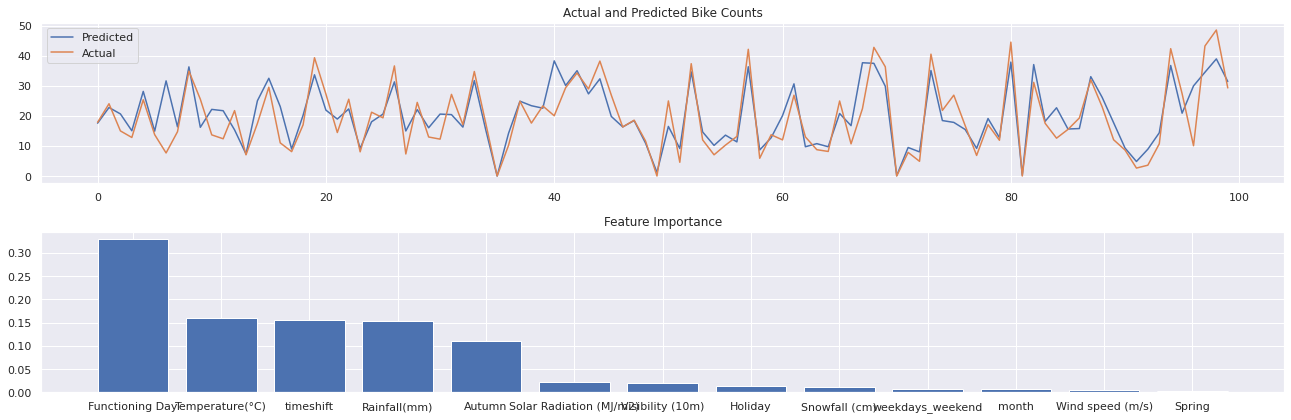

XGBRegressor(random_state=42, verbosity=0)

In [308]:
analyse_model(xgb_regressor, X_train, X_test, y_train, y_test)


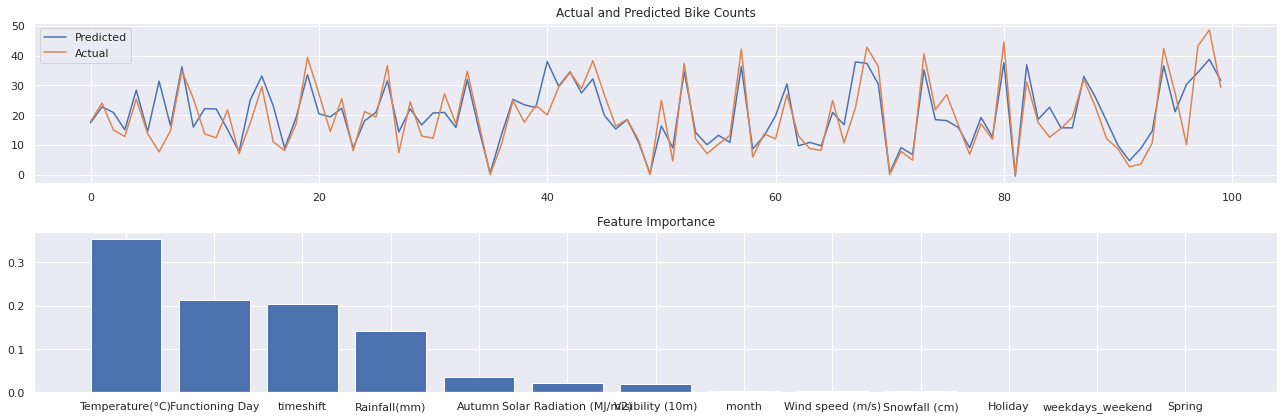

GradientBoostingRegressor(random_state=4)

In [309]:
analyse_model(gb_regressor, X_train, X_test, y_train, y_test)


### Model Explainability(Lime & SHAP)

In [310]:
#Lime Section
!pip install lime
!pip install numpy==1.19.4
!pip install --upgrade lime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [311]:
X_train1=pd.DataFrame(X_train,columns=['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'month', 'weekdays_weekend', 'timeshift', 'Autumn',
       'Spring'])
X_test1=pd.DataFrame(X_test,columns=['Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'month', 'weekdays_weekend', 'timeshift', 'Autumn',
       'Spring'])

In [312]:
#Lime and SHAP
# LIME SECTION

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X.values,
                                                   feature_names=X.columns,
                                                   class_names=['target'],
                                                   verbose=True,
                                                   mode='regression')





In [313]:
pred = xgb_regressor.predict(X.iloc[0].values.reshape(1, -1))[0]

In [314]:
exp = explainer.explain_instance(X.iloc[0].values, xgb_regressor.predict, num_features=len(X.columns))


Intercept 21.495315035494357
Prediction_local [8.26794237]
Right: 8.307228


In [315]:
# Print the LIME explanation
print(exp.as_list())

# Visualize the LIME explanation
exp.show_in_notebook(show_table=True)

[('Temperature(°C) <= 3.50', -13.93416195008143), ('Rainfall(mm) <= 0.00', 13.205662775217666), ('timeshift <= 0.00', -13.022602282527584), ('Snowfall (cm) <= 0.00', 1.614617977718294), ('Autumn <= 0.00', -1.573804318562706), ('Holiday <= 0.00', 0.7574831850344952), ('Spring <= 0.00', -0.43639975875693626), ('weekdays_weekend <= 0.00', 0.38299428552710213), ('Solar Radiation (MJ/m2) <= 0.00', -0.230299558327014), ('1.50 < Wind speed (m/s) <= 2.30', -0.08374282025649088), ('month <= 4.00', 0.08095804350841578), ('1698.00 < Visibility (10m) <= 2000.00', 0.011921758776982056), ('Functioning Day <= 1.00', 0.0)]


unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.8/dist-packages/lime/bundle.js' mode='r' encoding='utf8'>


In [316]:
#SHAP Section

!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [317]:
import shap 
sns.set_style('darkgrid')

In [318]:
for_instance=2

In [319]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_regressor)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[int(for_instance)])

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I am considering **RMSE** which is usually considered as evaluation metric and also with that **train r2** and **test r2**.

**RMSE**, it not only calculates how close the prediction is to the actual value on average, but it also indicates the effect of large errors

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I Choosed **XGBoost** as my final model because it is giving high train and test r2 among all models

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Explainability is already explained with feature importance iin Lime & SHAP section

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [320]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [321]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1) **Summer** season has the count of **highest** number of rented bikes while **winter**    has very **low** , so we can say **temperature during the day** is affecting the most to sales.

2) Out of total, **96.5%** of bikes got rented on Non Holiday days.

3) During day and evening people are preferring the bikes most .

4) between **7 to 9 am & 5 to 9** pm has most of the bikes rented.

5) **Snowfall** , **Rainfall** and **Humidity** are having **Negative** Relationship with Count 
  of rented bikes while **temperature** is showing **positive** relationship.

6) months of January,February and december showing low numbers of rented bikes.

7) We will consider **XGBoost** as final because it is considering whether it is working day or not and also good metrics.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***